In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

dispSize = 10
plt.rcParams['figure.figsize'] = [dispSize*2, dispSize]

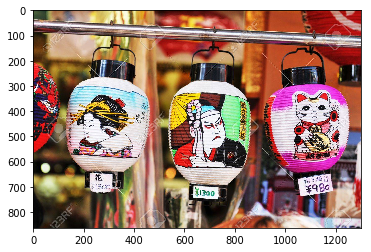

In [4]:
jap_img = cv2.imread('japan_lamps.jpg')
jap_img = cv2.cvtColor(jap_img,cv2.COLOR_BGR2RGB)
jap_gray = cv2.cvtColor(jap_img,cv2.COLOR_RGB2GRAY)

plt.imshow(jap_img)

(863, 1300)


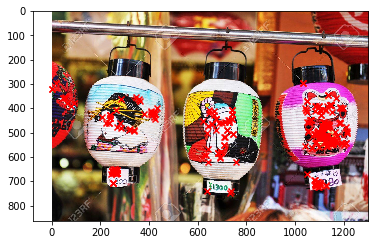

In [5]:
corners = cv2.cornerHarris(jap_gray,2,5,0.04)
print(corners.shape)

plt.imshow(jap_img)
values_sort = corners.flatten().copy() 
values_sort.sort()
corners = np.where(corners>values_sort[-300])

plt.scatter(corners[1],corners[0],c="r",marker='x')
plt.show()

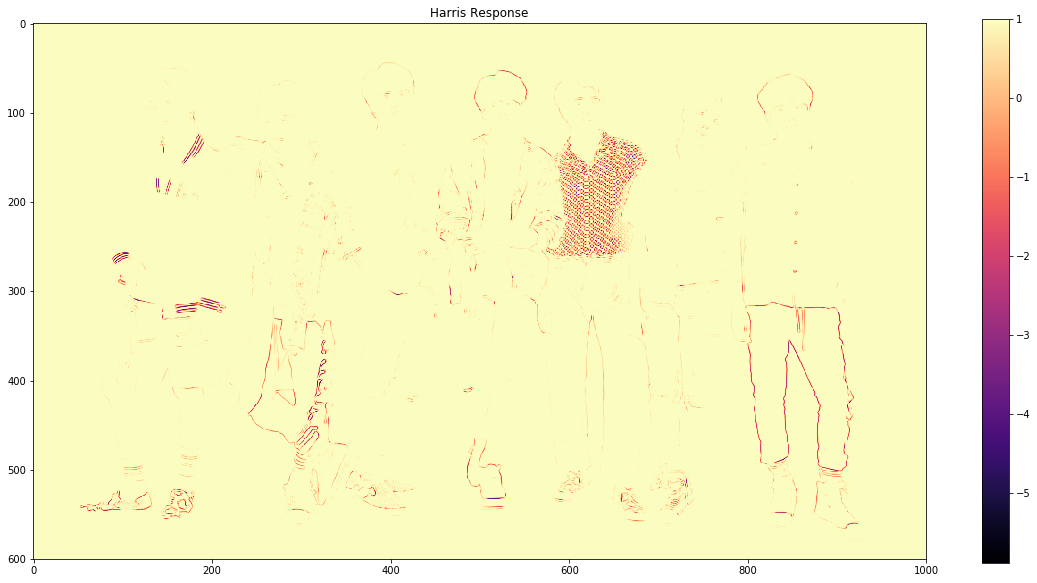

(600, 1000)


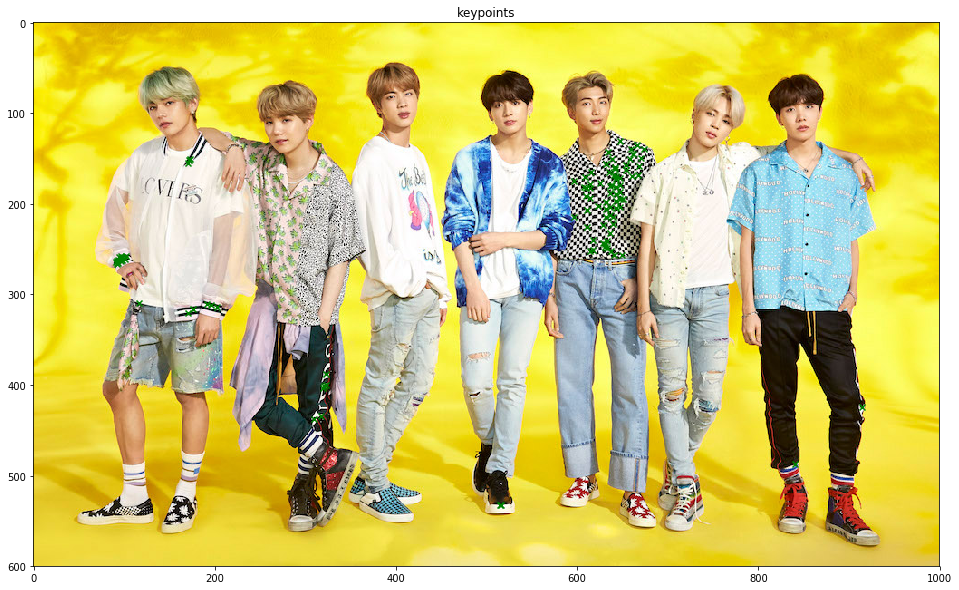

In [14]:
def harris(img,k):
    gray = img.copy().astype(np.float32)/255
    if img.shape[-1]>1:
        gray = cv2.cvtColor(gray,cv2.COLOR_RGB2GRAY)
        
    sobel = np.array([
        [1,0,-1],
        [2,0,-2],
        [1,0,-1]])
    i_x = cv2.filter2D(gray,-1,sobel) 
    i_y = cv2.filter2D(gray,-1,sobel.transpose()) 
    
    M = np.array([
        [i_x*i_x, i_x*i_y],
        [i_x*i_y, i_y*i_y]
    ])
    R = cv2.determinant(M) - k*np.trace(M)**2
    plt.imshow(R,cmap='magma')
    plt.colorbar()
    plt.title('Harris Response')
    plt.show()
    return R

bts_img = cv2.imread('bts.jpg')
bts_img = cv2.cvtColor(bts_img,cv2.COLOR_BGR2RGB)
    
hrs = harris(bts_img,0.02)
print(hrs.shape)
values_sort = hrs.flatten().copy() 
values_sort.sort()
corners = np.where(hrs<values_sort[100])

plt.imshow(bts_img)
plt.title('Keypoints')
plt.scatter(corners[1],corners[0],c="g",marker='x')
plt.show()